<a href="https://colab.research.google.com/github/devrk23/correlationAnalysis/blob/main/Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/merged_datasets.csv'
data = pd.read_excel(file_path)


occupation_mapping = {
    "School Student": 1,
    "University Student": 2,
    "Part-time students": 3,
    "Employed": 4,
    "Exploring": 5
}

depression_duration_mapping = {
    "Less than 6 months": 1,
    "6 months to 1 year": 2,
    "1-2 years": 3,
    "2-5 years": 4,
    "More than 5 years": 5
}


data['Occupation'] = data['Occupation'].map(occupation_mapping)


print(data.columns)


data['Duration of Symptoms'] = data['Duration of Symptoms'].map(depression_duration_mapping)

output_path = '/content/Book1.xlsx'
data.to_excel(output_path, index=False)

print("Encoding complete. The file has been saved as 'Book1_encoded.xlsx'.")

Index(['Response', 'Age', 'Gender', 'Occupation', 'Field of Work',
       'Relationship Status', 'Diagnosed with Depression', 'Specify Diagnosis',
       'Duration of Symptoms', 'Depression Level (1-10)', 'Creative Person',
       'Frequency of Creative Activities',
       'Creativity Influenced by Mental State',
       'Effect of Mental State on Creativity', 'Noticed Correlation',
       'Feelings Influence Creativity', 'Moods Boosted or Blocked Creativity',
       'Specific Emotions Increase Creativity',
       'Emotions That Increase Creativity', 'Additional Notes', 'Art Therapy',
       'Creative Writing', 'Creative activities', 'Creative activities (e.g.',
       'Exercise', 'Group Therapy', 'Medication', 'Mindfulness',
       'Mindfulness/meditation', 'Music', 'Music Therapy', 'Socialising',
       'Socialising with friends/family', 'Socializing with friends/family',
       'Support Groups', 'Therapy/Counseling', 'Therapy/Counselling',
       'Writing', 'art)', 'writing', 'Animat

In [ ]:
#data cleaning
import pandas as pd


file_path = '/content/merged_datasets.csv'
df = pd.read_excel(file_path)

gender_mapping = {'Male': 1, 'Female': 2, 'Non-Binary': 3}
df['Gender'] = df['Gender'].map(gender_mapping)

frequency_mapping = {
    'Daily': 5,
    'Several times a week': 4,
    'Weekly': 3,
    'Monthly': 2,
    'Rarely/Never': 1
}
df['Frequency of Creative Activities'] = df['Frequency of Creative Activities'].map(frequency_mapping)


diagnosis_mapping = {'Yes': 1, 'No': 0}
df['Diagnosed with Depression'] = df['Diagnosed with Depression'].map(diagnosis_mapping)



coping_dummies = df['Coping Mechanisms'].str.get_dummies(sep=', ')
df = pd.concat([df, coping_dummies], axis=1)


creativity_dummies = df['Creative Areas'].str.get_dummies(sep=', ')
df = pd.concat([df, creativity_dummies], axis=1)


df = df.drop(columns=['Coping Mechanisms', 'Creative Areas'])

output_file_path = '/content/Book1.xlsx'
df.to_excel(output_file_path, index=False)

print("Data cleaned and saved successfully!")


Data cleaned and saved successfully!


Index(['age', 'gender', 'occupation', 'field of work', 'relationship status',
       'diagnosed with depression', 'specify diagnosis',
       'duration of symptoms', 'coping mechanisms', 'depression level (1-10)',
       'creative person', 'creative areas', 'frequency of creative activities',
       'creativity influenced by mental state',
       'effect of mental state on creativity', 'noticed correlation',
       'feelings influence creativity', 'moods boosted or blocked creativity',
       'specific emotions increase creativity',
       'emotions that increase creativity', 'additional notes'],
      dtype='object')
Column 'Depression Level (1-10)' not found in the DataFrame.

Gender Frequencies:
 gender
1    79
2    41
0    22
3     9
Name: count, dtype: int64

Gender Percentages:
 gender
1    52.317881
2    27.152318
0    14.569536
3     5.960265
Name: proportion, dtype: float64

Diagnosis Frequencies:
 diagnosed with depression
No     91
Yes    60
Name: count, dtype: int64

Diagno

<ipython-input-15-3cd2982aeb3c>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")


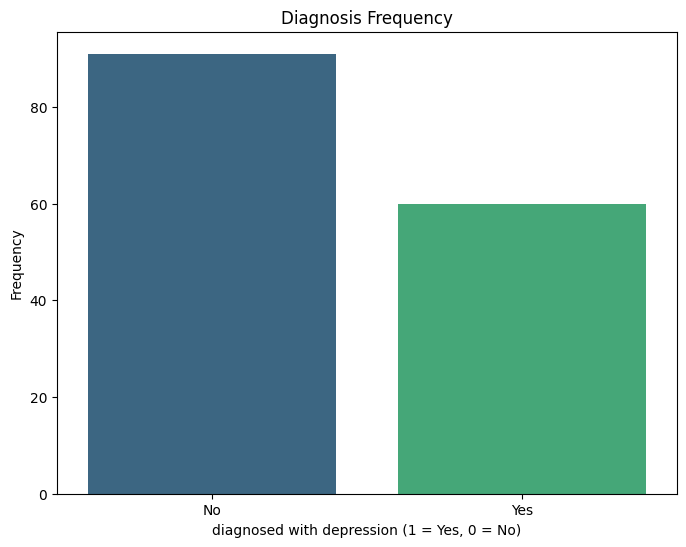

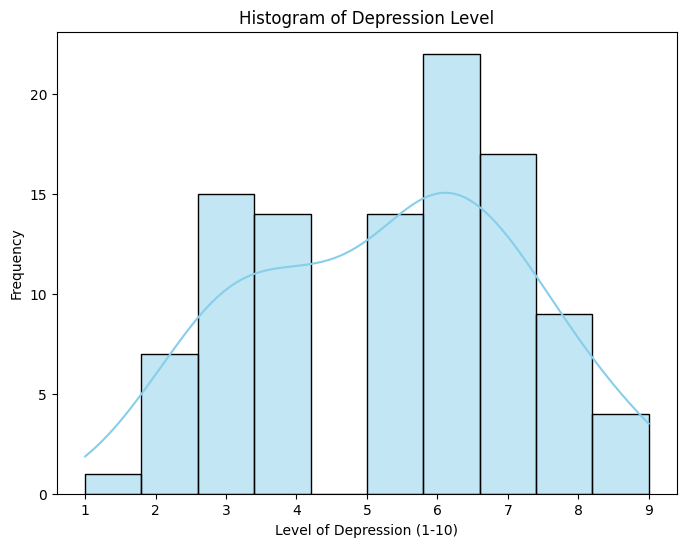

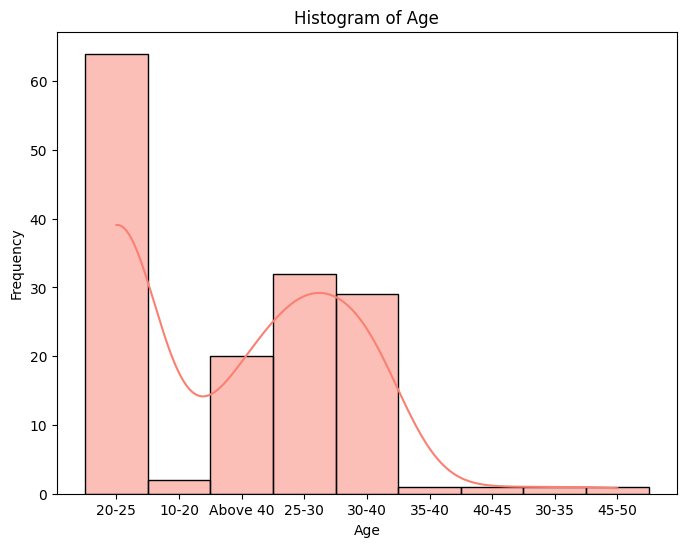

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = '/content/merged_datasets.xlsx'
df = pd.read_excel(file_path)

# Step 1: Descriptive Statistics
print(df.columns)
try:
    depression_stats = df['Depression Level (1-10)'].describe()
    mean_depression = depression_stats['mean']
    median_depression = df['Depression Level (1-10)'].median()
    mode_depression = df['Depression Level (1-10)'].mode()[0]
    std_depression = depression_stats['std']

    print(f"Depression Level (1-10) - Mean: {mean_depression}, Median: {median_depression}, Mode: {mode_depression}, Standard Deviation: {std_depression}")
except KeyError:
    print("Column 'Depression Level (1-10)' not found in the DataFrame.")



# Gender
gender_counts = df['gender'].value_counts()
gender_percentages = df['gender'].value_counts(normalize=True) * 100

# Diagnosis
diagnosis_counts = df['diagnosed with depression'].value_counts()
diagnosis_percentages = df['diagnosed with depression'].value_counts(normalize=True) * 100

# Occupation
occupation_counts = df['occupation'].value_counts()
occupation_percentages = df['occupation'].value_counts(normalize=True) * 100

print("\nGender Frequencies:\n", gender_counts)
print("\nGender Percentages:\n", gender_percentages)
print("\nDiagnosis Frequencies:\n", diagnosis_counts)
print("\nDiagnosis Percentages:\n", diagnosis_percentages)
print("\nOccupation Frequencies:\n", occupation_counts)
print("\nOccupation Percentages:\n", occupation_percentages)

# Step 2: Visualizations


# Bar Chart for Diagnosis
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
plt.title("Diagnosis Frequency")
plt.xlabel("diagnosed with depression (1 = Yes, 0 = No)")
plt.ylabel("Frequency")
plt.show()

# Histogram for Depression Level
plt.figure(figsize=(8, 6))
sns.histplot(df['depression level (1-10)'], kde=True, bins=10, color="skyblue")
plt.title("Histogram of Depression Level")
plt.xlabel("Level of Depression (1-10)")
plt.ylabel("Frequency")
plt.show()

# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=10, color="salmon")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:

depression_unique_counts = df['depression level (1-10)'].value_counts()
activity_unique_counts = df['frequency of creative activities'].value_counts()

print("Unique values in 'Depression Level (1-10)':\n", depression_unique_counts)
print("\nUnique values in 'Frequency of Creative Activities':\n", activity_unique_counts)


Unique values in 'Depression Level (1-10)':
 depression level (1-10)
6.0    22
7.0    17
3.0    15
5.0    14
4.0    14
8.0     9
2.0     7
9.0     4
1.0     1
Name: count, dtype: int64

Unique values in 'Frequency of Creative Activities':
 frequency of creative activities
Daily                   42
Weekly                  38
Several times a week    33
Occasionally            24
Monthly                  6
Rarely/Never             5
Multiple times a day     3
Name: count, dtype: int64


In [ ]:
df = df.dropna(subset=['depression level (1-10)', 'frequency of creative activities'])


In [ ]:
import pandas as pd

# Load the uploaded Excel file to examine its contents
file_path = '/content/merged_datasets.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,gender,occupation,field of work,relationship status,diagnosed with depression,specify diagnosis,duration of symptoms,coping mechanisms,depression level (1-10),...,creative areas,frequency of creative activities,creativity influenced by mental state,effect of mental state on creativity,noticed correlation,feelings influence creativity,moods boosted or blocked creativity,specific emotions increase creativity,emotions that increase creativity,additional notes
0,20-25,1,University Student,Student,In relationship,No,NaN,NaN,NaN,NaN,...,"Music, Performing Arts (e.g., acting, dancing)",Weekly,Yes,NaN,Yes,Sometimes I feel less creative in a bad mood s...,Blocked,No,NaN,I’m not really sure
1,10-20,0,School Student,Student,In relationship,No,NaN,NaN,NaN,NaN,...,"Writing, Design (e.g., graphic, fashion, creat...",Weekly,Maybe,NaN,Yes,NaN,Boosted,No,NaN,How does it correlate
2,20-25,1,University Student,Student,Single,No,NaN,NaN,NaN,NaN,...,"Writing, Visual Arts (e.g., painting, drawing)...",Weekly,Yes,yes absolutely I’ve noticed it’s plays a huge ...,Yes,Taking part in creative activities is like a f...,Not sure,Yes,Honestly sometimes really deep depressive stat...,10/10 recommend getting a creative outlet for ...
3,20-25,0,University Student,Student,Single,No,NaN,NaN,NaN,NaN,...,Music,Daily,Maybe,NaN,Maybe,NaN,Boosted,No,NaN,-
4,Above 40,1,Employed,Business,Married,No,NaN,NaN,NaN,NaN,...,"Visual Arts (e.g., painting, drawing)",Rarely/Never,Yes,I don't know,Yes,Not able concentrate or think creative due to ...,Not sure,No,NaN,No specific answer


In [ ]:
import pandas as pd
from scipy.stats import shapiro, kstest, spearmanr

# Load the Excel file
file_path = "/content/merged_datasets.xlsx"
data = pd.read_excel(file_path)

# Step 1: Identify and Sum Creative Activity Frequency Columns
creative_activity_columns = [col for col in data.columns if col not in [
    'Age', 'Gender', 'Occupation', 'Field of Work',
    'Relationship Status', 'Diagnosed with Depression',
    'Specify Diagnosis', 'Duration of Symptoms', 'Depression Level (1-10)']
    and not col.startswith('Writing.')]

# Convert columns to numeric, handling errors
for col in creative_activity_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate a total frequency score for creative activities by summing binary indicators
data['Frequency of Creative Activities'] = data[creative_activity_columns].sum(axis=1)


analysis_data = data[['depression level (1-10)', 'Frequency of Creative Activities']].dropna()
depression_level = analysis_data['depression level (1-10)']
creative_frequency = analysis_data['Frequency of Creative Activities']

# Check the number of available values for both variables
print("Number of non-NaN values for Depression Level:", len(depression_level))
print("Number of non-NaN values for Creative Activity Frequency:", len(creative_frequency))

# Proceed only if both variables have at least 3 non-missing values
if len(depression_level) >= 3 and len(creative_frequency) >= 3:
    # Step 3: Perform Normality Tests
    # Shapiro-Wilk Test for Normality
    shapiro_depression = shapiro(depression_level)
    shapiro_creative_frequency = shapiro(creative_frequency)

    # Kolmogorov-Smirnov Test for Normality
    ks_depression = kstest(depression_level, 'norm', args=(depression_level.mean(), depression_level.std()))
    ks_creative_frequency = kstest(creative_frequency, 'norm', args=(creative_frequency.mean(), creative_frequency.std()))

    # Print Normality Test Results
    print("Shapiro-Wilk Test - Depression Level:", shapiro_depression)
    print("Shapiro-Wilk Test - Creative Activity Frequency:", shapiro_creative_frequency)
    print("Kolmogorov-Smirnov Test - Depression Level:", ks_depression)
    print("Kolmogorov-Smirnov Test - Creative Activity Frequency:", ks_creative_frequency)

    # Since both variables are non-normal, we use Spearman's Rank Correlation
    correlation, p_value = spearmanr(depression_level, creative_frequency)
    print("Spearman's Rank Correlation:", correlation)
    print("P-value:", p_value)
else:
    print("Insufficient data: At least three non-missing values are required for both variables.")


Number of non-NaN values for Depression Level: 103
Number of non-NaN values for Creative Activity Frequency: 103
Shapiro-Wilk Test - Depression Level: ShapiroResult(statistic=0.9576807914263066, pvalue=0.0022935781884294714)
Shapiro-Wilk Test - Creative Activity Frequency: ShapiroResult(statistic=0.9699204291782464, pvalue=0.01894168755269742)
Kolmogorov-Smirnov Test - Depression Level: KstestResult(statistic=0.1482498257197551, pvalue=0.019327701140155824, statistic_location=6.0, statistic_sign=-1)
Kolmogorov-Smirnov Test - Creative Activity Frequency: KstestResult(statistic=0.09391571203512683, pvalue=0.30434774836267714, statistic_location=10.0, statistic_sign=1)
Spearman's Rank Correlation: 0.8397970076508315
P-value: 1.5119309306289498e-28


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Load the data (adjust the file path if needed)
file_path = "//content/Book1.xlsx"
data = pd.read_excel(file_path)

# Step 1: Summarize Frequency of Creative Activities and Ensure Data Alignment
creative_activity_columns = [col for col in data.columns if col not in [
    'Response', 'Age', 'Gender', 'Occupation', 'Field of Work',
    'Relationship Status', 'Diagnosed with Depression',
    'Specify Diagnosis', 'Duration of Symptoms', 'Depression Level (1-10)']
    and not col.startswith('Writing.')]

# Convert activity columns to numeric
for col in creative_activity_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate frequency score for creative activities
data['Frequency of Creative Activities'] = data[creative_activity_columns].sum(axis=1)

# Align data for correlation analysis
analysis_data = data[['Depression Level (1-10)', 'Frequency of Creative Activities']].dropna()
depression_level = analysis_data['Depression Level (1-10)']
creative_frequency = analysis_data['Frequency of Creative Activities']

# Step 2: Perform Spearman's Rank Correlation Analysis
correlation, p_value = spearmanr(depression_level, creative_frequency)


# Step 3: Interpret the Results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Interpret the strength of the correlation based on the guidelines
if abs(correlation) >= 0.80:
    strength = "Very strong"
elif abs(correlation) >= 0.60:
    strength = "Strong"
elif abs(correlation) >= 0.40:
    strength = "Moderate"
elif abs(correlation) >= 0.20:
    strength = "Weak"
else:
    strength = "Very weak"

print(f"Interpretation: The correlation coefficient indicates a {strength} association between the level of depression and frequency of creative activities.")


The correlation is statistically significant.
Interpretation: The correlation coefficient indicates a Weak association between the level of depression and frequency of creative activities.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load data (adjust the file path as needed)
file_path = "/content/merged_datasets.xlsx"
data = pd.read_excel(file_path)

# Define diagnosis variable and relevant creative activity columns
diagnosis_col = 'Diagnosed with Depression'  # Original column name
creative_activity_columns = [col for col in data.columns if col not in [
    'Response', 'Age', 'Gender', 'Occupation', 'Field of Work',
    'Relationship Status', 'Specify Diagnosis', 'Duration of Symptoms',
    'Depression Level (1-10)', 'Frequency of Creative Activities']
    and not col.startswith('Writing.')]

# Check if the diagnosis column exists with different casing or spaces
if diagnosis_col not in data.columns:
    # Try finding the column with different casing
    diagnosis_col = next((col for col in data.columns if col.lower() == diagnosis_col.lower()), None)

    # If still not found, try finding the column with stripped spaces
    if diagnosis_col is None:
        diagnosis_col = next((col for col in data.columns if col.strip() == diagnosis_col.strip()), None)

    # If found, print a message indicating the actual column name
    if diagnosis_col:
        print(f"Diagnosis column found as: '{diagnosis_col}'")
    else:
        raise KeyError(f"Diagnosis column '{diagnosis_col}' not found in the DataFrame.")


# Step through each creative activity and run the Chi-Square test
chi_square_results = {}
for activity in creative_activity_columns:

    contingency_table = pd.crosstab(data[diagnosis_col], data[activity])

    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[activity] = (chi2, p)

# Print results
print("Chi-Square Test Results:")
for activity, (chi2, p) in chi_square_results.items():
    print(f"{activity}: Chi-Square = {chi2}, p-value = {p}")

Diagnosis column found as: 'diagnosed with depression'
Chi-Square Test Results:
age: Chi-Square = 14.833811122426424, p-value = 0.062458601166478084
gender: Chi-Square = 12.084604035862144, p-value = 0.007098891162307901
occupation: Chi-Square = 34.23695578468718, p-value = 8.117000185292631e-05
field of work: Chi-Square = 25.134256708789312, p-value = 0.022163571215641387
relationship status: Chi-Square = 16.77677533295006, p-value = 0.010139605072946988
diagnosed with depression: Chi-Square = 146.85286525211663, p-value = 8.450759090924446e-34
specify diagnosis: Chi-Square = 0.0, p-value = 1.0
duration of symptoms: Chi-Square = 11.386666666666667, p-value = 0.1807376613385366
coping mechanisms: Chi-Square = 94.09063307493541, p-value = 4.701208375501762e-06
depression level (1-10): Chi-Square = 82.42034145441121, p-value = 1.5903492372544087e-14
creative person: Chi-Square = 8.720880169448872, p-value = 0.01277276531357111
creative areas: Chi-Square = 121.02904040404044, p-value = 0.

# New section

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load data (adjust the file path as needed)
file_path = "/content/merged_datasets.xlsx"
data = pd.read_excel(file_path)

# Define diagnosis variable and relevant creative activity columns
diagnosis_col = 'Diagnosed with Depression'
creative_activity_columns = [col for col in data.columns if col not in [
    'Response', 'Age', 'Gender', 'Occupation', 'Field of Work',
    'Relationship Status', 'Specify Diagnosis', 'Duration of Symptoms',
    'Depression Level (1-10)', 'Frequency of Creative Activities']
    and not col.startswith('Writing.')]

# Check if the diagnosis column exists with different casing or spaces
if diagnosis_col not in data.columns:
    # Try finding the column with different casing
    diagnosis_col = next((col for col in data.columns if col.lower() == diagnosis_col.lower()), None)

    # If still not found, try finding the column with stripped spaces
    if diagnosis_col is None:
        diagnosis_col = next((col for col in data.columns if col.strip() == diagnosis_col.strip()), None)

    # If found, update the diagnosis_col variable with the actual column name
    if diagnosis_col:
        print(f"Diagnosis column found as: '{diagnosis_col}'")
    else:
        raise KeyError(f"Diagnosis column '{diagnosis_col}' not found in the DataFrame.")

# Initialize a list to hold summary results
summary_results = []

for activity in creative_activity_columns:

    contingency_table = pd.crosstab(data[diagnosis_col], data[activity])

    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    significance = 'Significant' if p < 0.05 else 'Not Significant'

    # Store the results in the summary list
    summary_results.append({
        'Creative Activity': activity,
        'Chi-Square Statistic': chi2,
        'P-Value': p,
        'Significance': significance
    })

summary_df = pd.DataFrame(summary_results)

# Define the path to save the Excel file
output_file = "/content/cleaned data.xlsx"

# Save the summary DataFrame to an Excel file
summary_df.to_excel(output_file, index=False)

# Print confirmation message with the file path
print(f"Summary results saved to {output_file}")

Diagnosis column found as: 'diagnosed with depression'
Summary results saved to /content/cleaned data.xlsx


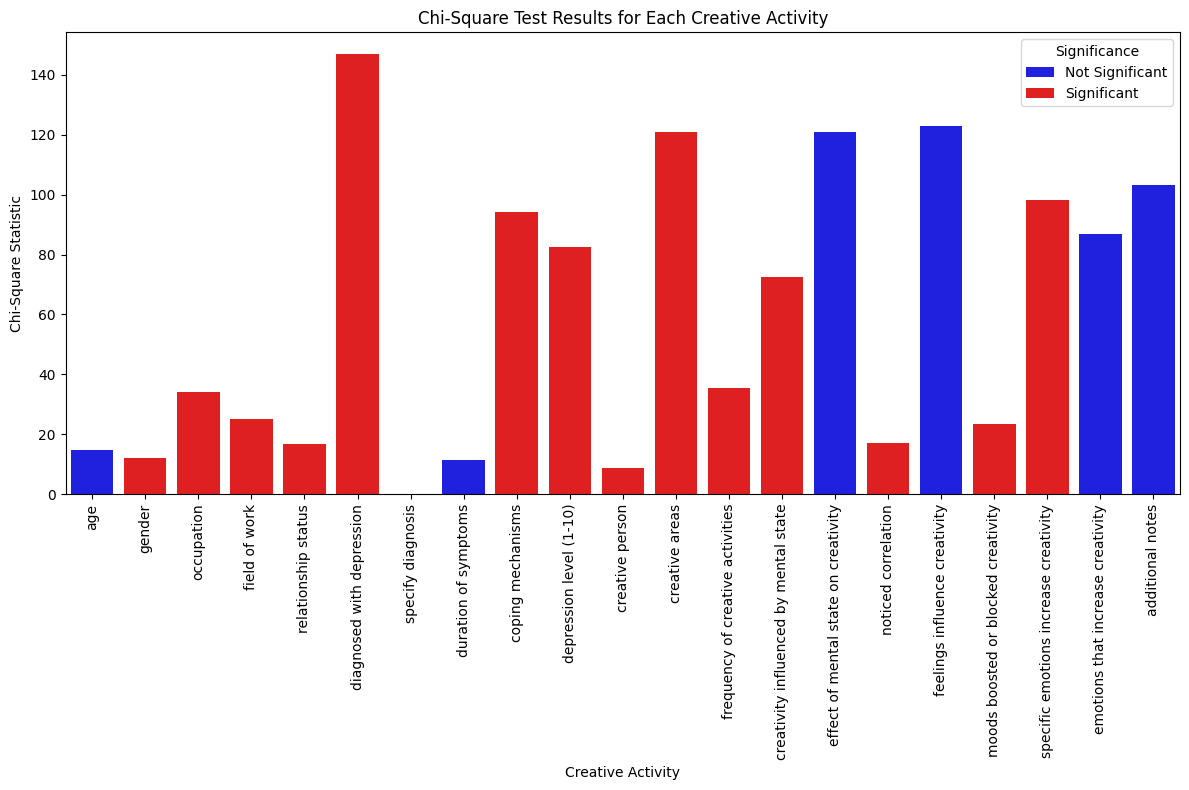

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary_df = pd.read_excel("/content/cleaned data.xlsx")

summary_df['Color'] = summary_df['Significance'].apply(lambda x: 'red' if x == 'Significant' else 'blue')

plt.figure(figsize=(12, 8))
sns.barplot(data=summary_df, x='Creative Activity', y='Chi-Square Statistic', hue='Significance', dodge=False, palette={'Significant': 'red', 'Not Significant': 'blue'})


plt.xticks(rotation=90)


plt.title('Chi-Square Test Results for Each Creative Activity')
plt.xlabel('Creative Activity')
plt.ylabel('Chi-Square Statistic')
plt.legend(title='Significance')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: okay could you generate a code to visualise the results of the chi square results from the code abocec

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot to visualize the Chi-Square statistics for each activity
plt.figure(figsize=(12, 6))
sns.barplot(x='Creative Activity', y='Chi-Square Statistic', data=summary_df, palette="viridis")
plt.title("Chi-Square Statistic for Creative Activities vs. Diagnosis")
plt.xlabel("Creative Activity")
plt.ylabel("Chi-Square Statistic")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Create a bar plot to visualize the P-values for each activity
plt.figure(figsize=(12, 6))
sns.barplot(x='Creative Activity', y='P-Value', data=summary_df, palette="viridis")
plt.title("P-Values for Creative Activities vs. Diagnosis")
plt.xlabel("Creative Activity")
plt.ylabel("P-Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Load the uploaded Excel file to examine its contents
file_path = '/content/cleaned data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Creative Activity,Chi-Square Statistic,P-Value,Significance
0,age,14.833811,0.062459,Not Significant
1,gender,12.084604,0.007099,Significant
2,occupation,34.236956,0.000081,Significant
3,field of work,25.134257,0.022164,Significant
4,relationship status,16.776775,0.010140,Significant


In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Load the data
file_path = "/content/merged_datasets.xlsx"
data = pd.read_excel(file_path)

# Step 2: Define 'Coping Mechanisms' and 'Frequency of Creative Activities'
# Replace 'coping_mechanism_column' with the actual name of your coping mechanism column in the dataset
coping_mechanism_column = 'coping mechanisms'
creative_activity_column = 'frequency of creative activities'

# Ensure relevant columns are in the dataset
if coping_mechanism_column in data.columns and creative_activity_column in data.columns:
    data = data[[coping_mechanism_column, creative_activity_column]].dropna()
    groups = [group[creative_activity_column].values for name, group in data.groupby(coping_mechanism_column)]

    # Step 4: Perform the Kruskal-Wallis test
    kruskal_result = kruskal(*groups)

    # Output the results
    print("Kruskal-Wallis H-test statistic:", kruskal_result.statistic)
    print("P-value:", kruskal_result.pvalue)

    # Interpretation
    if kruskal_result.pvalue < 0.05:
        print("There is a statistically significant difference in the frequency of creative activities across coping mechanism groups.")
    else:
        print("No statistically significant difference in the frequency of creative activities across coping mechanism groups.")
else:
    print("The dataset does not contain the necessary columns for this analysis.")


Kruskal-Wallis H-test statistic: 77.01207558947986
P-value: 0.0005613327727419578
There is a statistically significant difference in the frequency of creative activities across coping mechanism groups.


<Figure size 1000x600 with 0 Axes>

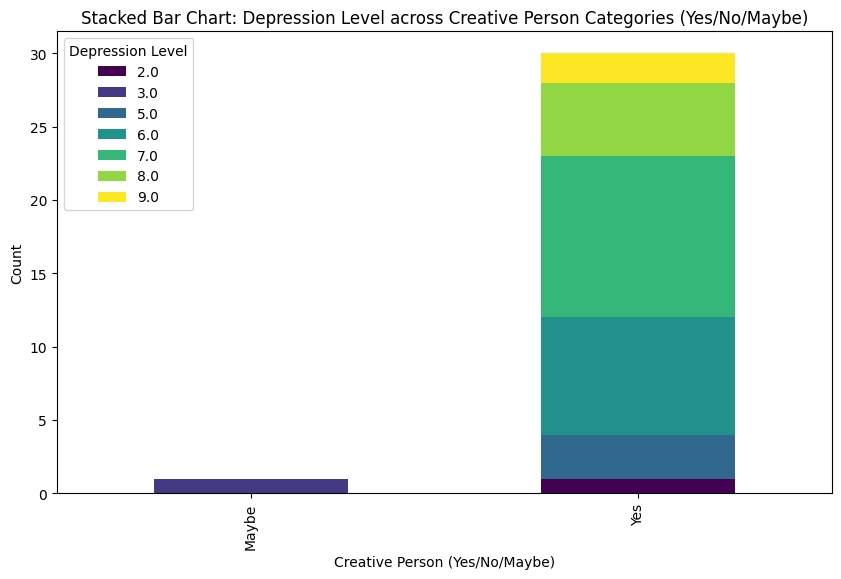

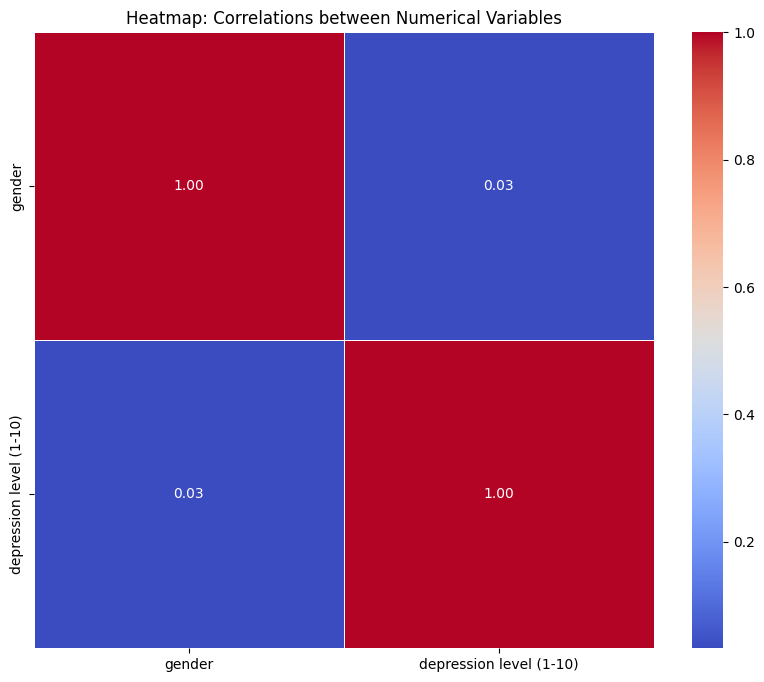

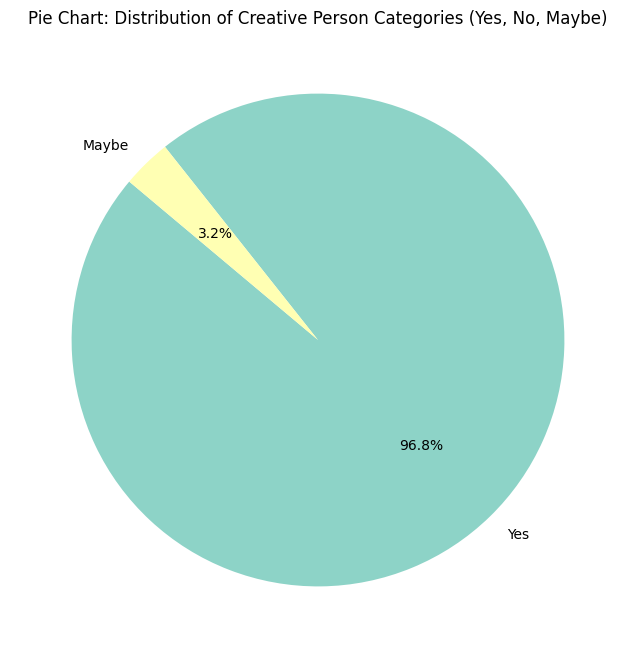

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = "/content/merged_datasets.xlsx"
data = pd.read_excel(file_path)

data = data.dropna()


depression_column = 'depression level (1-10)'
creative_frequency_column = 'frequency of creative activities'
creative_person_column = 'creative person'

# 1. Stacked Bar Chart: Depression Level across Creative Categories
plt.figure(figsize=(10, 6))
stacked_data = pd.crosstab(data[creative_person_column], data[depression_column])
stacked_data.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("Stacked Bar Chart: Depression Level across Creative Person Categories (Yes/No/Maybe)")
plt.xlabel("Creative Person (Yes/No/Maybe)")
plt.ylabel("Count")
plt.legend(title="Depression Level")
plt.show()

# 2. Heatmap: Correlation Matrix
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlations between Numerical Variables")
plt.show()

# 3. Pie Chart: Distribution of Creative Person (Yes, No, Maybe)
plt.figure(figsize=(8, 8))
creative_counts = data[creative_person_column].value_counts()
plt.pie(creative_counts, labels=creative_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Pie Chart: Distribution of Creative Person Categories (Yes, No, Maybe)")
plt.show()
